In [1]:

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.dpi'] = 200
import numpy as np
import odebook as ob
eps = 1e-2

# Домашнее задание 3.
# Выполнил студент 171-ой группы Лупашин Евгений.

## Задание 1.

Для начала запишем систему из условия в виде матрицы:
\begin{gather}
\begin{pmatrix}
	\dot x \\\\
	\dot y
\end{pmatrix}
=
\begin{pmatrix}
	-7 & 10 \\\\
	-4 & 5
\end{pmatrix}
\cdot
\begin{pmatrix}
	x \\\\
	y
\end{pmatrix}
\end{gather}

\begin{gather}
A = 
\begin{pmatrix}
	-7 & 10 \\\\
	-4 & 5
\end{pmatrix}
\end{gather}

**a)** Характеристический многочлен этой матрицы равен:
$p(\lambda) = \lambda^2 + 2\lambda + 5$

Решив уравнение $p = 0$ получаем собственные значения:
$\lambda_1 = -1 + 2i, \ \lambda_2 = -1 - 2i$

Соответственно собственные вектора:
$v_1 = (3 - i, 2), \ v_2 = (3 + i, 2)$

**b)** Ну, в общем-то, мы уже нашли второй собственный вектор, но можем явно проверить:
\begin{gather}
A \cdot v_2 =
\begin{pmatrix}
	-1 - 7i \\\\
	-2 - 4i
\end{pmatrix}
=
\lambda_2 \cdot v_2
\end{gather}

**c)**
$$ Re(v) = (3, 2) \\
Im(v) = i \cdot (1, 0) $$

\begin{gather}
C = 
\begin{pmatrix}
	3 & 1 \\\\
	2 & 0
\end{pmatrix}
\end{gather}

\begin{gather}
\begin{pmatrix}
	x \\\\
	y
\end{pmatrix}
=
C
\cdot
\begin{pmatrix}
	\xi \\\\
	\eta
\end{pmatrix}
\end{gather}
$ % x = 3\xi + i\eta \\
% y = 2\xi $
\begin{gather}
C^{-1} A C = 
\begin{pmatrix}
	-1 & -2 \\\\
	2 & -1
\end{pmatrix}
\end{gather}

**d)** $\dot z = (-1 + 2i) \cdot z, \ z = q + ir$

$ \dot q + i \dot r = (-1 + 2i) \cdot (q + ir) \\
\dot q + i \dot r = -q + 2iq - ir - 2r $
\begin{cases}
\dot q = -q - 2r,\\\\
\dot r = 2q - r
\end{cases}

**e)** Как видим, матрицы получились одинаковые.

**f)** Общее решение, как известно, имеет вид: $$z(t) = C \cdot e^{(-1 + 2i)t}$$
Найдём частное с заданным начальным условием:
$$z(0) = q_0 + i r_0 \ \Rightarrow \ z(t) = (q_0 + i r_0) e^{(-1 + 2i)t}$$

**g)** Распишем $z(t)$:
$$z(t) =  (q_0 + i r_0) \cdot e^{-t} \cdot (\cos(2t) + i\sin(2t))$$
$$q(t) = e^{-t} \cdot (q_0 \cos(2t) - r_0 \sin(2t))$$
$$r(t) = e^{-t} \cdot (q_0 \sin(2t) + r_0 \cos(2t))$$

**h)** Вон они, эти решения — в предыдущем пункте. Но, чтобы тут хоть что-то сделать, можем переписать решения в виде матрицы:
\begin{gather}
\begin{pmatrix}
	\xi \\\\
	\eta
\end{pmatrix}
=
e^{-t}
\begin{pmatrix}
	\cos(2t) & -\sin(2t) \\\\
	\sin(2t) & \cos(2t)
\end{pmatrix}
\cdot
\begin{pmatrix}
	\xi_0 \\\\
	\eta_0
\end{pmatrix}
\end{gather}


**i)** Чтобы получить решения исходной системы, нужно перейти к другому базису (исходному):

\begin{gather}
\begin{pmatrix}
	x \\\\
	y
\end{pmatrix}
=
C
\cdot
\begin{pmatrix}
	\xi \\\\
	\eta
\end{pmatrix}
=
e^{-t} C
\begin{pmatrix}
	\cos(2t) & -\sin(2t) \\\\
	\sin(2t) & \cos(2t)
\end{pmatrix}
\cdot
\begin{pmatrix}
	\xi_0 \\\\
	\eta_0
\end{pmatrix}
\end{gather}

**j)** Это очевидным образом вытекает из предыдущего пункта, а если по отдельности выписать, чему равны $x$ и $y$ (а это будет почти то же самое, что $r(t)$ и $q(t)$, то можно в этом убедиться

**k)**

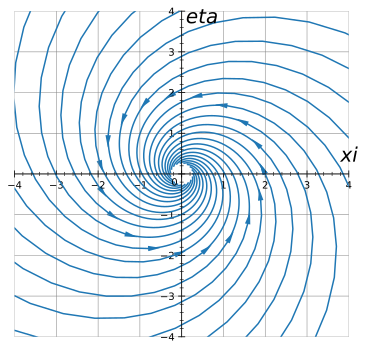

In [32]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('xi', 'eta'))

theta = np.linspace(0, 2 * np.pi, 20)
r = 2
x = np.cos(theta) * r
y = np.sin(theta) * r

ob.phaseportrait(lambda X: np.array([-X[0] - 2 * X[1], 2 * X[0] - X[1]]), 
    np.array([x, y]).T, t=(-8, 2), n=100, linewidth=1.5)

[]

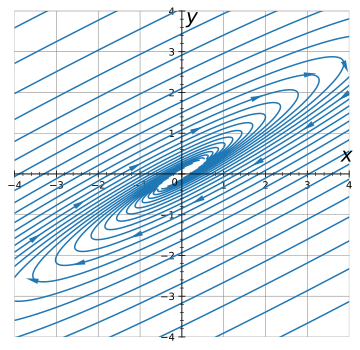

In [43]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(0, 2 * np.pi, 20)
r = 1
q = 1
u = q * np.cos(2 * theta) - r * np.sin(2 * theta)
v = q * np.sin(2 * theta) + r * np.cos(2 * theta)

C = np.array([[3, 1], [2, 0]])

ob.phaseportrait(lambda X: np.array([-7 * X[0] + 10 * X[1], -4* X[0] + 5 * X[1]]),
    (C @ np.array([u, v])).T, t=(-2, 2), n=100, linewidth=1.5)
plt.plot()

## Задание 2.

Заметим, что алгоритм решения будет в точности таким же, как в предыдущем номере, так что не будем подробно описывать процесс решения, будем выписывать сами решения и рисовать фазовый портрет

**a)**
\begin{cases}
\dot x = x - 2y,\\\\
\dot y = y
\end{cases}

Решения:

$x(t) = (-2x_0 - 2y_0 t) e^t \\
y(t) = y_0 e^t$

В точке $(0, 0)$ неустойчивый вырожденный узел (собственные значения равны, матрица не диагонализуема)

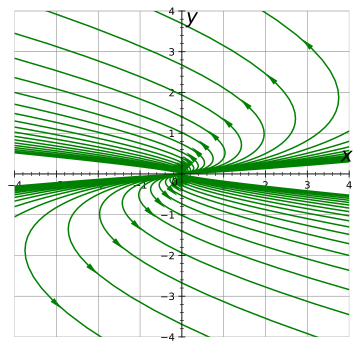

In [77]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(-5, 5, 32)
x = -np.e ** theta
y = -np.e ** theta
ob.phaseportrait(lambda X, t=0: np.array([X[0] - 2 * X[1], X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=100, linewidth=1.5, color='green')
x = np.e ** theta
y = np.e ** theta
ob.phaseportrait(lambda X, t=0: np.array([X[0] - 2 * X[1], X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=100, linewidth=1.5, color='green')

**b)** 
\begin{cases}
\dot x = 5x - 5y,\\\\
\dot y = 2x - y
\end{cases}

Решения:

$x(t) = (-5x_0\cos(t) - 5y_0\sin(t)) e^{2t} \\
y(t) = (x_0(-\sin(t) - 3\cos(t)) + y_0(-3\sin(t) + cos(t))) e^{2t}$

В точке $(0, 0)$ неустойчивый фокус (собственные значения комплексные, $a \neq 0$)

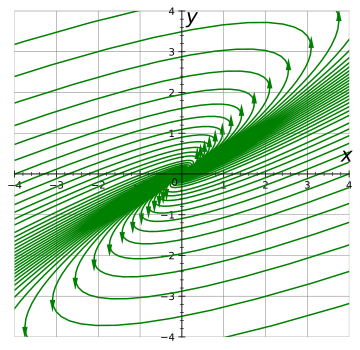

In [85]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(-1, 5, 32)
x = -np.e ** theta
y = -np.e ** theta
ob.phaseportrait(lambda X, t=0: np.array([5 * X[0] - 5 * X[1], 2 * X[0] - 1 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=200, linewidth=1.5, color='green')
x = np.e ** theta
y = np.e ** theta
ob.phaseportrait(lambda X, t=0: np.array([5 * X[0] - 5 * X[1], 2 * X[0] - 1 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=200, linewidth=1.5, color='green')

**c)**
\begin{cases}
\dot x = -6x + 6y,\\\\
\dot y = -9x + 9y
\end{cases}

Решения:

$x(t) = 6 C e^{3t} + 6x_0 \\
y(t) = 9 C e^{3t} + 6y_0$

Точка $(0, 0)$ вырожденная, так как сама матрица этой система вырожденная (детерминант = 0)

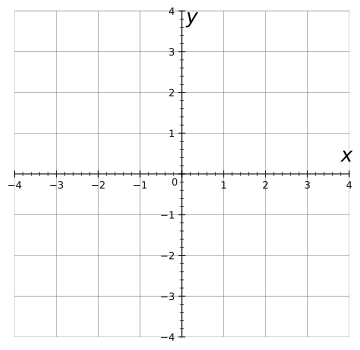

In [104]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(-3, 3, 32)
x = theta
y = theta
ob.phaseportrait(lambda X: np.array([-6 * X[0] + 6 * X[1], -9 * X[0] + 9 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=11, linewidth=3, color='green')
x = -theta
y = -theta
ob.phaseportrait(lambda X: np.array([-6 * X[0] + 6 * X[1], -9 * X[0] + 9 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=11, linewidth=3, color='green')

**d)**
\begin{cases}
\dot x = -2x + 10y,\\\\
\dot y = -3x + 9y
\end{cases}

Решения:

$x(t) = 10 (x_0 + y_0) e^{4t} - 10 y_0 e^{3t} \\
y(t) = 6 (x_0 + y_0) e^{4t} - 5 y_0 e^{3t}$

В точке $(0, 0)$ неустойчивый узел (собственные значения положительные, различные)

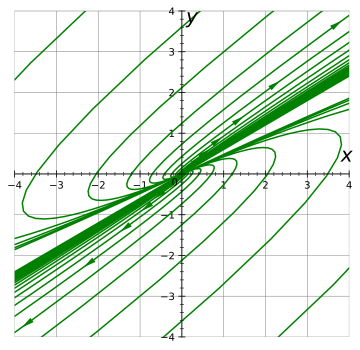

In [115]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(-20, 5, 48)
x = -np.e ** theta
y = -np.e ** theta
ob.phaseportrait(lambda X: np.array([-2 * X[0] + 10 * X[1], -3 * X[0] + 9 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=200, linewidth=1.5, color='green')
x = np.e ** theta
y = np.e ** theta
ob.phaseportrait(lambda X: np.array([-2 * X[0] + 10 * X[1], -3 * X[0] + 9 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=200, linewidth=1.5, color='green')

**e)**
\begin{cases}
\dot x = 12x - 16y,\\\\
\dot y = 8x - 12y
\end{cases}

Решения:

$x(t) = -16 (x_0 + y_0) e^{4t} - 16 (\frac{15}{16} x_0 - y_0) e^{-4t} \\
y(t) = -8 (x_0 + y_0) e^{4t} - 16 (\frac{15}{16} x_0 - y_0) e^{-4t}$

В точке $(0, 0)$ устойчивое седло (собственные значения вещественные, разного знака)

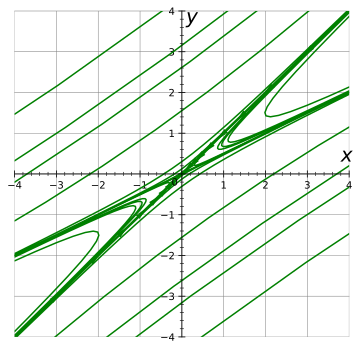

In [134]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

theta = np.linspace(-2, 50, 101)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([12 * X[0] - 16 * X[1], 8 * X[0] - 12 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([12 * X[0] - 16 * X[1], 8 * X[0] - 12 * X[1]]), 
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')

## Задание 3.

**a)** Нужно просто проанализировать собственные значения в зависимости от $s$:

$\lambda_1 = \sqrt{4s + 9} + 7 \\
\lambda_2 = -\sqrt{4s + 9} + 7$

0) $s > 10$ — седло

1) $s = 10$ — вырожденная особая точка

2) $-\frac{9}{4} < s < 10$ — узел

3) $s = -\frac{9}{4}$ — вырожденный узел

4) $s < -\frac{9}{4}$ — фокус


**c)** Ниже будут нарисованы несколько картинок

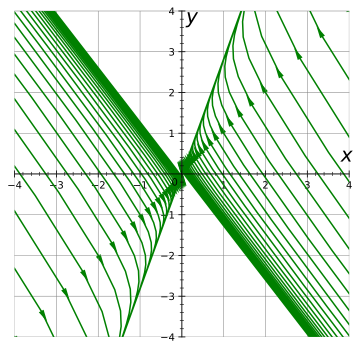

In [138]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

s = 15
theta = np.linspace(-5, 20, 101)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')

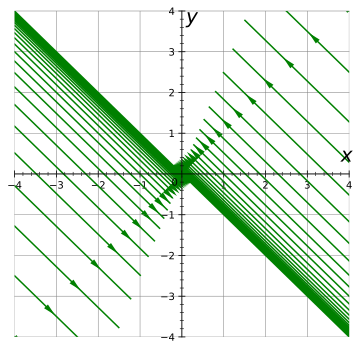

In [144]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

s = 10
theta = np.linspace(-5, 20, 101)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-20, 20), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-20, 20), n=199, linewidth=1.5, color='green')

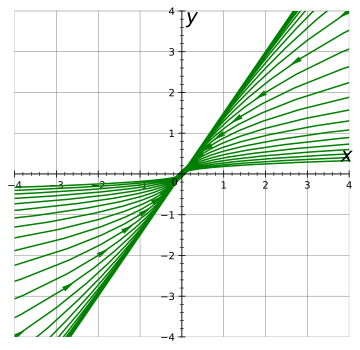

In [145]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

s = 0
theta = np.linspace(-5, 20, 51)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')

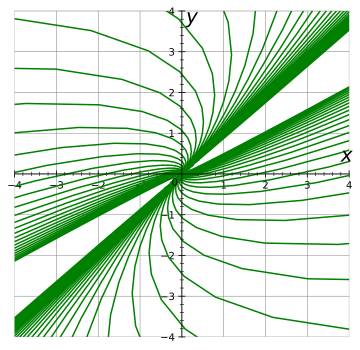

In [149]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

s = -9/4
theta = np.linspace(-20, 10, 51)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')

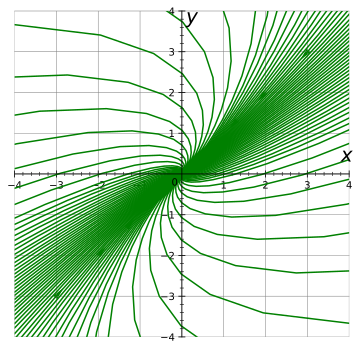

In [150]:
plt.figure(num=None, figsize=(6, 6), dpi=200, facecolor='w', edgecolor='k')
ob.axes4x4(labels=('x', 'y'))

s = -3
theta = np.linspace(-20, 10, 51)
x = - 2 ** theta
y = - 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')
x = 2 ** theta
y = 2 ** theta
ob.phaseportrait(lambda X: np.array([-10 * X[0] + 4 * X[1], s * X[0] - 4 * X[1]]),
    np.array([x, y]).T, t=(-10, 10), n=199, linewidth=1.5, color='green')

## Задание 4.